In [1]:
using PGFPlots

In [2]:
resetPGFPlotsPreamble()
include("/home/ANON/Documents/Util/support_code.jl");

In [3]:
using BSON

# Example Encounter Figure

In [5]:
include("encounter_model/straight_line_model.jl")

get_encounter_set (generic function with 1 method)

In [8]:
res = BSON.load("data_files/enc_pgf_info.bson")
b = res[:b]
rdrl = res[:rdrl]
risks_b = res[:risks_b]
risks_rdrl = res[:risks_rdrl];

In [82]:
alert_inds_b = findall(b[1].a .!= 0)
alert_inds_rdrl = findall(rdrl[1].a .!= 0);

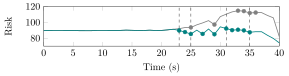

In [115]:
times = collect(0:49)
ax1 = Axis(Plots.Linear(times, risks_b, mark="none", style="thick, gray"))
push!(ax1, Plots.Linear(times, risks_rdrl, mark="none", style="thick, teal"))
push!(ax1, Plots.Scatter(times[alert_inds_b], risks_b[alert_inds_b], mark="*",
    style="mark options = {fill=gray, draw=gray}"))
push!(ax1, Plots.Scatter(times[alert_inds_rdrl], risks_rdrl[alert_inds_rdrl], mark="*",
    style="mark options = {fill=teal, draw=teal}"))
push!(ax1, Plots.Linear([23, 23], [70, 120], mark="none", style="black, dashed"))
push!(ax1, Plots.Linear([25, 25], [70, 120], mark="none", style="black, dashed"))
push!(ax1, Plots.Linear([31, 31], [70, 120], mark="none", style="black, dashed"))
push!(ax1, Plots.Linear([35, 35], [70, 120], mark="none", style="black, dashed"))
ax1.width = "10cm"
ax1.height = "3cm"
ax1.xmin = 0.0
ax1.xmax = 40.0
ax1.ymin = 70.0
ax1.ymax = 120.0
ax1.xlabel = "Time (s)"
ax1.ylabel = "Risk"
ax1.style = "ylabel style = {yshift = 0.25cm}"
ax1

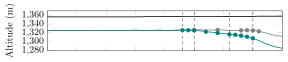

In [114]:
ax2 = Axis(Plots.Linear(times, b[1].z0 .+ 1578, mark="none", style="thick, gray"))
push!(ax2, Plots.Linear(times, rdrl[1].z0 .+ 1578, mark="none", style="thick, teal"))
push!(ax2, Plots.Linear(times, b[1].z1 .+ 1578, mark="none", style="thick, black"))
push!(ax2, Plots.Scatter(times[alert_inds_b], b[1].z0[alert_inds_b] .+ 1578, mark="*",
    style="mark options = {fill=gray, draw=gray}"))
push!(ax2, Plots.Scatter(times[alert_inds_rdrl], rdrl[1].z0[alert_inds_rdrl] .+ 1578, mark="*",
    style="mark options = {fill=teal, draw=teal}"))
push!(ax2, Plots.Linear([23, 23], [1280, 1370], mark="none", style="black, dashed"))
push!(ax2, Plots.Linear([25, 25], [1280, 1370], mark="none", style="black, dashed"))
push!(ax2, Plots.Linear([31, 31], [1280, 1370], mark="none", style="black, dashed"))
push!(ax2, Plots.Linear([35, 35], [1280, 1370], mark="none", style="black, dashed"))
ax2.width = "10cm"
ax2.height = "3cm"
ax2.xmin = 0.0
ax2.xmax = 40.0
ax2.ymin = 1280.0
ax2.ymax = 1370.0
ax2.style = "xticklabels={,}"
ax2.ylabel = "Altitude (m)"
ax2

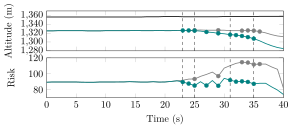

In [116]:
g = GroupPlot(1, 2, groupStyle="horizontal sep = 0.5cm, vertical sep = 0.25cm")
push!(g, ax2)
push!(g, ax1)
g

In [117]:
#PGFPlots.save("figures/altitude_risk_profile.tex", g, include_preamble=false)

In [59]:
x0s = b[1].x0[1:41]
y0s = b[1].y0[1:41]
x1s = b[1].x1[1:41]
y1s = b[1].y1[1:41]

p0 = hcat(x0s, y0s)
p1 = hcat(x1s, y1s)

θ = 250
rot_mat = [cosd(θ) -sind(θ); sind(θ) cosd(θ)]

p0rot = p0 * rot_mat
p1rot = p1 * rot_mat;

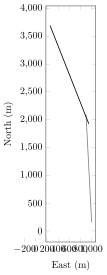

In [72]:
ax3 = Axis(Plots.Linear(p0rot[:, 1] .+ 4600, p0rot[:, 2], mark="none", style="thick, gray"))
push!(ax3, Plots.Linear(p1rot[:, 1] .+ 4600, p1rot[:, 2], mark="none", style="thick, black"))
ax3.height = "10cm"
ax3.axisEqualImage = true
ax3.xlabel = "East (m)"
ax3.ylabel = "North (m)"
ax3

In [74]:
#PGFPlots.save("figures/ground_track.tex", ax3, include_preamble=false);

# Cumulative Risk and Results Figure

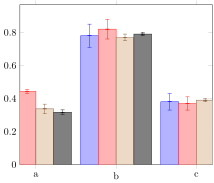

In [5]:
ax = Axis(Plots.BarChart(["a", "b", "c"], [0.504, 0.78, 0.38], 
          errorBars=ErrorBars(y=[0.017, 0.07, 0.05])))
push!(ax, Plots.BarChart(["a", "b", "c"], [0.443, 0.82, 0.37],
      errorBars=ErrorBars(y=[0.011, 0.06, 0.04])))
push!(ax, Plots.BarChart(["a", "b", "c"], [0.337, 0.77, 0.39], 
      errorBars=ErrorBars(y=[0.029, 0.02, 0.01])))
push!(ax, Plots.BarChart(["a", "b", "c"], [0.317, 0.79, 0.39], 
      errorBars=ErrorBars(y=[0.014, 0.01, 0.02])))
ax

In [6]:
res = BSON.load("data_files/cdfs.bson")
uniform_cdf = res[:uniform_cdf]
risk_cdf = res[:risk_cdf]
uniform_rl_cdf = res[:uniform_rl_cdf]
risk_rl_cdf = res[:risk_rl_cdf];

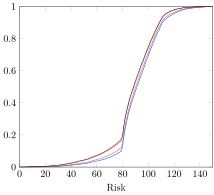

In [7]:
ax2 = Axis(Plots.Linear(collect(0:150), uniform_cdf, mark="none"))
push!(ax2, Plots.Linear(collect(0:150), risk_cdf, mark="none"))
push!(ax2, Plots.Linear(collect(0:150), uniform_rl_cdf, mark="none"))
push!(ax2, Plots.Linear(collect(0:150), risk_rl_cdf, mark="none"))
ax2.xmin = 0.0
ax2.xmax = 150.0
ax2.ymin = 0.0
ax2.ymax = 1.0
ax2.xlabel = "Risk"
ax2

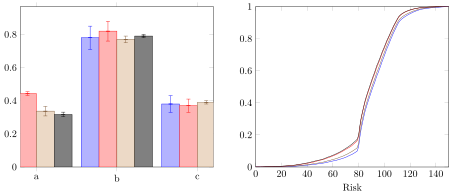

In [8]:
g = GroupPlot(2, 1, groupStyle="horizontal sep = 1.5cm")
push!(g, ax)
push!(g, ax2)
g

In [11]:
#PGFPlots.save("figures/daa_results_preamble.tex", g, include_preamble=true);

# Weighting Function

In [4]:
using POMDPs, POMDPGym, Crux, Flux, Distributions, BSON, GridInterpolations
using DataFrames, LinearAlgebra
using StatsBase

┌ Warning: You are using Matplotlib 3.3.4, which is no longer
│ officialy supported by the Plots community. To ensure smooth Plots.jl
│ integration update your Matplotlib library to a version >= 3.4.0
│ 
│ If you have used Conda.jl to install PyPlot (default installation),
│ upgrade your matplotlib via Conda.jl and rebuild the PyPlot.
│ 
│ If you are not sure, here are the default instructions:
│ 
│ In Julia REPL:
│ ```
│ import Pkg;
│ Pkg.add("Conda")
│ import Conda
│ Conda.update()
│ Pkg.build("PyPlot")
│ ```
│ 
└ @ Plots /home/ANON/.julia/packages/Plots/Xv2qA/src/backends/pyplot.jl:29


In [5]:
include("../src/risk_solvers.jl")

cvar_categorical (generic function with 1 method)

In [6]:
# Set up stuff for risk function
env = DetectAndAvoidMDP(ddh_max=1.0, px=DiscreteNonParametric([-0.5, 0.0, 0.5], [0.1, 0.8, 0.1]),
    actions=[-8.0, 0.0, 8.0])
hmax = 300
hs_half = hmax .- (collect(range(0, stop=hmax^(1 / 0.5), length=21))) .^ 0.5
hs = [-hs_half[1:end-1]; reverse(hs_half)]
dhs = range(-10, 10, length=21)
τs = range(0, 40, length=41)
policy = OptimalDetectAndAvoidPolicy(env, hs, dhs, τs)
costfn(m, s, sp) = isterminal(m, sp) ? 150 - abs(s[1]) : 0.0
rmdp = RMDP(env, policy, costfn, false, 1.0, 40.0, :both)
detect_model = BSON.load("models/nominal_error_model.bson")[:m]
p_detect(s) = detect_model([abs(s[1]), s[4]])[1]
function get_detect_dist(s)
    pd = p_detect(s)
    noises = [[ϵ, 0.0, 0.0, 0.0, 0.0] for ϵ in [0, 1]]
    return ObjectCategorical(noises, [1 - pd, pd])
end
noises_detect = [0, 1]
ϵ_grid = RectangleGrid(noises_detect)
noises = [[ϵ[1], 0.0, 0.0, 0.0, 0.0] for ϵ in ϵ_grid]
px = StateDependentDistributionPolicy(get_detect_dist, DiscreteSpace(noises))
cost_points = collect(range(0, stop=150, length=50))
s_grid = RectangleGrid(hs, dhs, env.actions, τs)
𝒮 = [[h, dh, a_prev, τ] for h in hs, dh in dhs, a_prev in env.actions, τ in τs];
s2pt(s) = s
@time Uw, Qw = solve_cvar_fixed_particle(rmdp, px, s_grid, 𝒮, s2pt,
    cost_points, mdp_type=:exp);
CVaR(s, ϵ, α) = CVaR(s, ϵ, s_grid, ϵ_grid, Qw, cost_points; α)
env = DetectAndAvoidMDP(ddh_max=1.0, px=DiscreteNonParametric([-0.5, 0.0, 0.5], [0.1, 0.8, 0.1]),
    actions=[-8.0, 0.0, 8.0])
rmdp = RMDP(env, policy, costfn, false, 1.0, 40.0, :both)
N = 10000
D = episodes!(Sampler(rmdp, px), Neps=N)
samples = D[:r][1, D[:done][:]]
dh_samps = D[:s][2, :]
a_prev_samps = D[:s][3, :]
function get_counts(samps, bins)
    counts = zeros(length(bins) - 1)
    for i = 1:length(bins)-1
        counts[i] = length(findall(bins[i] .≤ samps .< bins[i+1]))
    end
    return counts
end
dh_counts = get_counts(dh_samps, collect(-10.5:1:10.5))
wdh = dh_counts ./ sum(dh_counts)
a_prev_counts = get_counts(a_prev_samps, collect(-12:8:12))
wa_prev = a_prev_counts ./ sum(a_prev_counts)
function marginal_CVaR(h, τ, dhs, a_prevs, ϵ, s_grid, ϵ_grid, Qw, cost_points; α)
    w = zeros(length(cost_points))
    for (i, dh) in enumerate(dhs)
        for (j, a_prev) in enumerate(a_prevs)
            s = [h, dh, a_prev, τ]
            sis, sws = interpolants(s_grid, s)
            ϵis, ϵws = interpolants(ϵ_grid, ϵ)
            for (si, sw) in zip(sis, sws)
                for (ϵi, ϵw) in zip(ϵis, ϵws)
                    w .+= wdh[i] * wa_prev[j] * sw * ϵw .* Qw[ϵi][si]
                end
            end
        end
    end
    #w ./= (length(dhs) * length(a_prevs))

    if α == 0
        return w' * cost_points#, 0.0
    else
        return cvar_categorical(cost_points, w, α=α)[1]
    end
end
marginal_CVaR(h, τ, ϵ, α) = marginal_CVaR(h, τ, dhs, env.actions, ϵ, s_grid, ϵ_grid, Qw, cost_points; α)
marginal_riskmin(h, τ; α) = minimum([marginal_CVaR(h, τ, [noise], α) for noise in noises_detect])
marginal_riskmax(h, τ; α) = maximum([marginal_CVaR(h, τ, [noise], α) for noise in noises_detect])
marginal_risk_weight(h, τ; α) = marginal_riskmax(h, τ; α) - marginal_riskmin(h, τ; α);

  5.648880 seconds (45.80 M allocations: 1.934 GiB, 5.32% gc time, 40.86% compilation time)


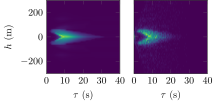

In [42]:
ax1 = Axis(Plots.Image((x, y) -> marginal_risk_weight(y, x, α=0), (0, 40), (-300, 300),
    colormap=pasteljet, colorbar=false))
ax1.xlabel = L"$\tau$ (s)"
ax1.ylabel = L"$h$ (m)"
ax1.height = "4.2cm"
ax1.width = "4.2cm"

ax2 = Axis(Plots.Histogram2(τsamps, hsamps, xmin=0, xmax=40, xbins=150, ybins=150,
    colormap=pasteljet, colorbar=false))
ax2.xlabel = L"$\tau$ (s)"
#ax2.ylabel = L"$h$ (m)"
ax2.height = "4.2cm"
ax2.width = "4.2cm"
ax2.xmin = 0
ax2.xmax = 40
ax2.ymin = -300
ax2.ymax = 300
ax2.style = "yticklabels = {,}"

g = GroupPlot(3, 1, groupStyle="horizontal sep = 0.5cm, vertical sep = 1.5cm")
push!(g, ax1)
push!(g, ax2)
#PGFPlots.save("daa_rw.tex", g, include_preamble=false)
g

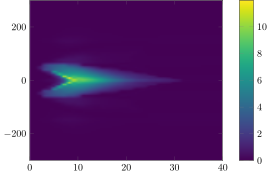

In [26]:
get_heat(x, y) = marginal_risk_weight(y, x, α=0)
ax1 = Axis(Plots.Image(get_heat, (0, 40), (-300, 300),
    (colormap = pasteljet)))

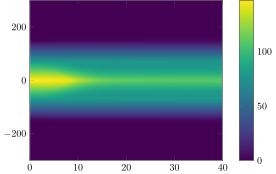

In [23]:
get_heat(x, y) = marginal_riskmax(y, x, α=0)
ax1 = Axis(Plots.Image(get_heat, (0, 40), (-300, 300),
    (colormap = pasteljet)))

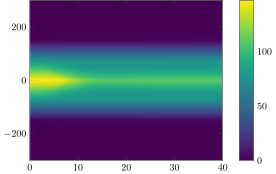

In [24]:
get_heat(x, y) = marginal_riskmin(y, x, α=0)
ax1 = Axis(Plots.Image(get_heat, (0, 40), (-300, 300),
    (colormap = pasteljet)))

In [31]:
using CSV
using DataFrames

states = DataFrame(CSV.File("data_files/risk_data_states_v1.csv"))
hsamps = states[:, :h]
τsamps = states[:, :τ];

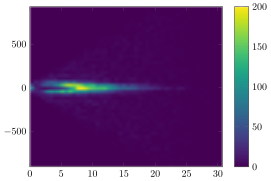

In [33]:
ax = Axis(Plots.Histogram2(τsamps, hsamps, colormap=pasteljet))

# DAA Policy

In [15]:
ra_1 = RGB(1.,1.,1.) # white
ra_2 = RGB(62.0/255.0,170.0/255.0,13.0/255.0) # pastel green
ra_3 = RGB(195.0/255.0,141.0/255.0,9.0/255.0) # pastel orange

colors = [ra_1, ra_2, ra_3]
a2ind = Dict(0 => 1, -8 => 2, 8 => 3)

function get_heat(x, y)
    a = action(policy, [y, 0.0, 0.0, x])
    return a2ind[a]
end

ax = Axis(Plots.Image(get_heat, (0, 40), (-300, 300), zmin=1, zmax=3, colormap = ColorMaps.RGBArrayMap(colors),
                      colorbar = false))
ax.xlabel = L"$\tau$ (s)"
ax.ylabel = L"$h$ (m)"
PGFPlots.save("figures/daa_pol.tex", ax, include_preamble=false)
#ax